# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [3]:
def apply_svd_custom(X_train, X_test, n_components):
    computeCovarianceMatrix = np.dot(X_train.T, X_train)

    eigenvalues, eigenvectors = np.linalg.eigh(computeCovarianceMatrix)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    top_components = sorted_indices[:n_components]
    top_eigenvectors = eigenvectors[:, top_components]

    X_train_svd = np.dot(X_train, top_eigenvectors)
    X_test_svd = np.dot(X_test, top_eigenvectors)

    return X_train_svd, X_test_svd, eigenvectors


## Part 3: Train Logistic Regression and Measure Performance

In [4]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')

    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [5]:
svd_components = [784, 500, 300, 100, 50, 10]  # You need to decide what number to search...

# Store the results
results = []
eigenvectors_784 = None  # To store the eigenvectors for 784 components

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")

    # Apply SVD to the training and test sets
    # Call apply_svd_custom() here...
    X_train_svd, X_test_svd, eigenvectors = apply_svd_custom(X_train, X_test, n_components)

    if n_components == 784:
        eigenvectors_784 = eigenvectors

    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)

    results.append((n_components, accuracy, training_time))

    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")


Training models with different levels of SVD preprocessing...
Applying custom SVD with 784 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 784, Accuracy: 0.9209, Training time: 916.6979 seconds
Applying custom SVD with 500 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 500, Accuracy: 0.9205, Training time: 534.8031 seconds
Applying custom SVD with 300 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 300, Accuracy: 0.9205, Training time: 251.1821 seconds
Applying custom SVD with 100 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 100, Accuracy: 0.9181, Training time: 58.4369 seconds
Applying custom SVD with 50 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 50, Accuracy: 0.9085, Training time: 16.4139 seconds
Applying custom SVD with 10 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 10, Accuracy: 0.8020, Training time: 1.1305 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


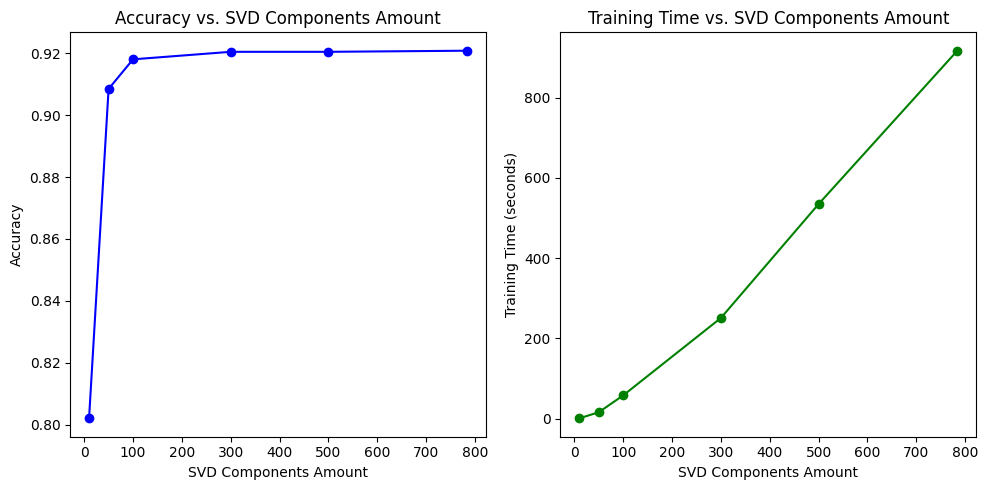

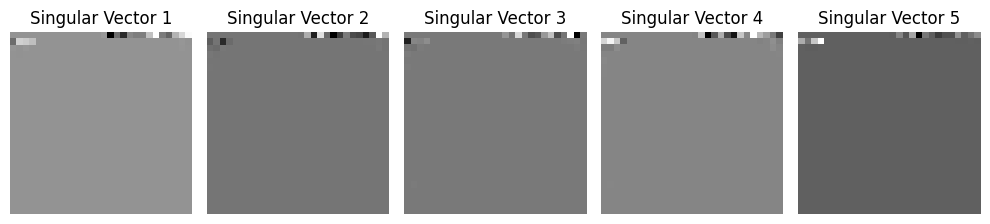

In [6]:
n_components = [result[0] for result in results]
accuracies = [result[1] for result in results]
training_times = [result[2] for result in results]

# Create a figure with two subplots: one for accuracy and one for training time
plt.figure(figsize=(10, 5))

# Plot 1: Accuracy vs. SVD Components Amount
plt.subplot(1, 2, 1)
plt.plot(n_components, accuracies, marker='o', color='blue')
plt.xlabel('SVD Components Amount')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. SVD Components Amount')

# Plot 2: Training Time vs. SVD Components Amount
plt.subplot(1, 2, 2)
plt.plot(n_components, training_times, marker='o', color='green')
plt.xlabel('SVD Components Amount')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time vs. SVD Components Amount')

plt.tight_layout()
plt.show()

# Visualizing the top 5 singular vectors
# Assuming `eigenvectors` were obtained from the custom SVD function (apply_svd_custom)

# Get the top 5 singular vectors (the most important patterns from the dataset)
top_5_singular_vectors = eigenvectors_784[:, :5]  # First 5 columns (top 5 vectors)

# Reshape each singular vector into a 28x28 image
fig, axes = plt.subplots(1, 5, figsize=(10, 5))
for i in range(5):
    singular_vector_image = top_5_singular_vectors[:, i].reshape(28, 28)
    axes[i].imshow(singular_vector_image, cmap='gray')
    axes[i].set_title(f'Singular Vector {i+1}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

## Part 6: Analyze / Conclusion

YOUR ANSWER:

First, to take a look at the impact of the number of components with SVD, we can see two correlations: 1. Larger number of components corresponds to increase in training time (linear relationship) and 2. Larger number of components corresponds to higher accuracy. For example, with 784 components, we reach 92% accuracy. However, it is also seen that the accuracy stabilizes around here. With even 100 components, we see that the accuracy is 91.81%, which is approaching 92%. 300 and 500 components are 92.05%, and then 784 is 92.09%.
Training time is linear. The time for 100 components is about 58.43 seconds, and the time for 784 components took 916.7 seconds. Knowing that the accuracy stabilizes mostly after 100 components, but training time increases linearly, we can conclude that we can reduce the amount of components with SVD (to a certain amount) and retain accuracy, but cut down on training time. This will make it more efficient for very large datasets. We can find an optimal number of components with SVD to use.
The singular vectors we see at the bottom of our graphs from Part 5 signify the direction of the data that varies the most. With this information, we can retain the most important information while also being able to reduce dimensionality (use small number of components).